# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print(potter_df.sort_values(by=['year'], ascending=False))


                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
len(movies[(movies["year"] >= 2000) & (movies["year"] <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
len(movies[movies.title.str.contains('Hamlet', case=False)])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
ham2000 = hamlet_df.sort_values(by=['year'], ascending=False)
print(ham2000[ham2000["year"] >= 2000])

                                          title  year
78217             Hamlet: The Fall of a Sparrow  2018
240089                Hamlet in the Golden Vale  2017
98329                               Hamlet (II)  2017
50271                            Hamlet/Horatio  2017
244747                                   Hamlet  2017
191940                                   Hamlet  2016
70547         Royal Shakespeare Company: Hamlet  2016
44571                               Hamlet (II)  2015
17531                            Hamlet's Ghost  2015
209533                 Hamlet, Son of a Kingpin  2015
186137                                   Hamlet  2015
133802            National Theatre Live: Hamlet  2015
10364                             Hamlet A.D.D.  2014
178290                                   Hamlet  2014
186136                      Harry, Hamlet and I  2013
17833                             Zombie Hamlet  2012
51236                            Hamlet Unbound  2012
227953                      

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
incep = cast[cast.title == 'Inception']
support = incep[incep.n.isnull()]
print(len(support))

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
incep = cast[cast.title == 'Inception']
main_cast = incep[incep.n.notnull()]
print(len(main_cast))

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
cast_rank = main_cast.sort_values('n')
cast_rank[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
albus_movies = cast[cast.character == "Albus Dumbledore"]
albus_movies

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [23]:
albus_movies.name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
keanu_roles = cast[cast.name == "Keanu Reeves"]
keanu_roles
print(len(keanu_roles))


62


In [25]:
keanu_roles_2000 = keanu_roles.sort_values("year", ascending=True)
print(keanu_roles_2000[(keanu_roles_2000["year"] >= 2000) & (keanu_roles_2000["n"] == 1.0)])

                                 title  year          name   type  \
1892397               The Replacements  2000  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892399                The Whole Truth  2016  Keanu Reeves  actor   
1892362           John Wick: Chapter 2  2017  Keanu Reeves  actor   
1892378                        Sib

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
actor_roles = cast[cast["type"].isin(["actor","actress"])]
actor_roles_1950_1960 = actor_roles[(actor_roles["year"] >= 1950) & (actor_roles["year"] <=1960)]
len(actor_roles_1950_1960)

234635

In [27]:
actor_roles_2007_2017 = actor_roles[(actor_roles["year"] >= 2007) & (actor_roles["year"] <=2017)]
len(actor_roles_2007_2017)

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
lead_roles = cast[(cast["n"] == 1.0) & (cast["year"] >= 2000)]
len(lead_roles)

60568

In [29]:
nonlead_roles = cast[(cast["n"] > 1.0) & (cast["year"] >= 2000)]
len(nonlead_roles)

1001710

In [30]:
support_roles = cast[(cast["n"].isnull()) & (cast["year"] >= 2000)]
len(support_roles)

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Othello                 11
The Three Musketeers    11
Honeymoon               11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

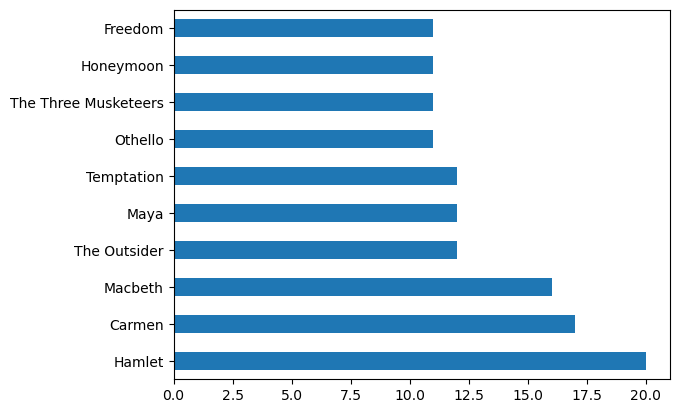

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
mov_by_year = movies.groupby("year").size()
df_mov = pd.DataFrame(mov_by_year)
mov2000s = mov_by_year.loc[2000:2020]
top_three = mov2000s.sort_values(ascending=False)
top_three[0:3]
#mov_by_year = movies.groupby("year").count()
#mov_by_year.columns


year
2017    11474
2016     9440
2015     8702
dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:xlabel='decade'>

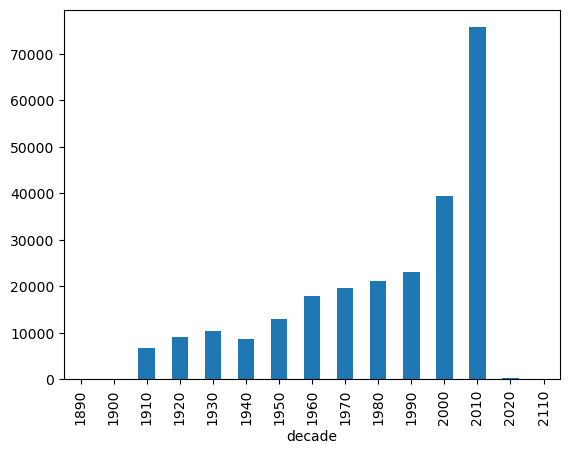

In [34]:
import numpy as np
movie_years = pd.DataFrame(movies["year"])
movie_years["decade"] = [int(np.floor(year/10) * 10) for year in np.array(movie_years["year"])]
movies_by_decade = movie_years.groupby("decade").size()
movies_by_decade.plot(kind="bar")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
test = pd.DataFrame(cast.groupby("character")["name"].size())
test.sort_values("name", ascending=False)[:10]

,name
character,
Himself,20746
Dancer,12477
Extra,11948
Reporter,8434
Student,7773
Doctor,7669
Party Guest,7245
Policeman,7029
Nurse,6999


In [36]:
herself = cast[cast["character"] == "Herself"]
top_herself = herself.groupby("name").size().sort_values(ascending = False)[:10]
top_herself
 
#top_herself = pd.DataFrame(herself.groupby("character")["name"].size())

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

In [37]:
himself = cast[cast["character"] == "Himself"]
top_himself = himself.groupby("name").size().sort_values(ascending = False)[:10]
top_himself

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [38]:
zombie = cast[cast["character"].str.startswith("Zombie")]

In [39]:
top_zombie = zombie.groupby("character").size().sort_values(ascending = False)[:10]
top_zombie

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
dtype: int64

In [40]:
police = cast[cast["character"].str.startswith("Police")]
top_police = police.groupby("character").size().sort_values(ascending = False)[:10]
top_police

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:xlabel='year'>

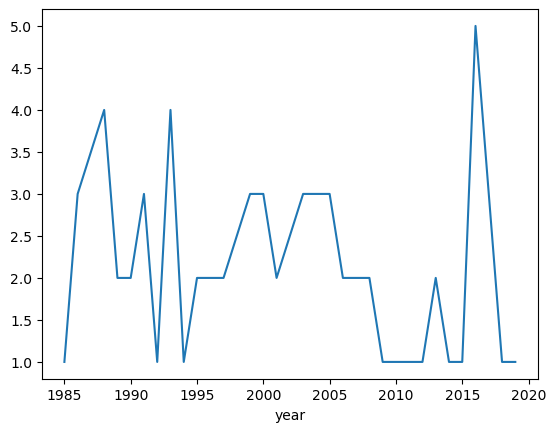

In [41]:
keanu = cast[cast["name"]=="Keanu Reeves"]
keanu_roles_year = keanu.groupby("year").size()
keanu_roles_year.plot()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year', ylabel='n'>

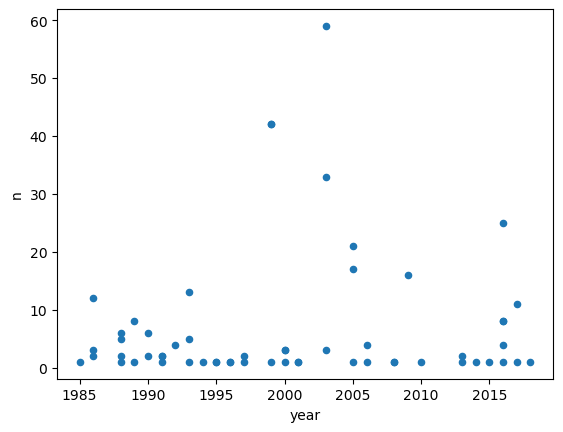

In [42]:
keanu.sort_values("year").plot(x="year", y="n", kind="scatter")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='decade'>

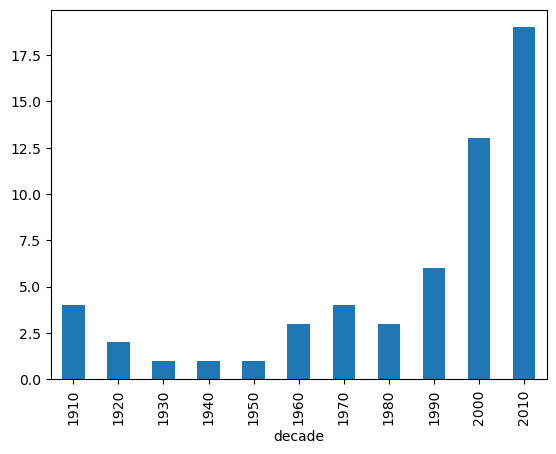

In [43]:

hamlet_df["decade"] = [int(np.floor(year/10) * 10) for year in np.array(hamlet_df["year"])]
hamlet_df
hamlet_by_decade = hamlet_df.groupby("decade").size()
hamlet_by_decade.plot(kind="bar")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [44]:
leading_roles = cast[(cast["n"] == 1.0) & (cast["type"].isin(['actor', 'actress']))]
leading_roles_60s = leading_roles[(leading_roles["year"] >= 1960) & (leading_roles["year"] < 1970)]
len(leading_roles_60s.index)

11823

In [45]:
leading_roles_2000s = leading_roles[(leading_roles["year"] >= 2000) & (leading_roles["year"] < 2010)]
len(leading_roles_2000s.index)

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [55]:
frank_oz = cast[cast["name"]=='Frank Oz']
frank_oz2 = pd.DataFrame([frank_oz["title"], frank_oz["year"], frank_oz["character"]]).transpose()
frank_multi = pd.DataFrame(frank_oz2.groupby(["title", "year"]).count()).sort_values("year")
frank_multi

,,character
title,year,
The Muppet Movie,1979,8
The Blues Brothers,1980,1
Star Wars: Episode V - The Empire Strikes Back,1980,1
An American Werewolf in London,1981,2
The Great Muppet Caper,1981,6
The Dark Crystal,1982,2
Trading Places,1983,1
Superman III,1983,1
Star Wars: Episode VI - Return of the Jedi,1983,1


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [72]:
foz_roles = pd.DataFrame([frank_oz.character, frank_oz.title]).transpose()
role_count = foz_roles.groupby("character").count()
role_count[role_count["title"] > 1]

,title
character,
Animal,6
Bert,3
Cookie Monster,5
Fozzie Bear,4
Grover,2
Miss Piggy,6
Sam the Eagle,5
Yoda,6


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

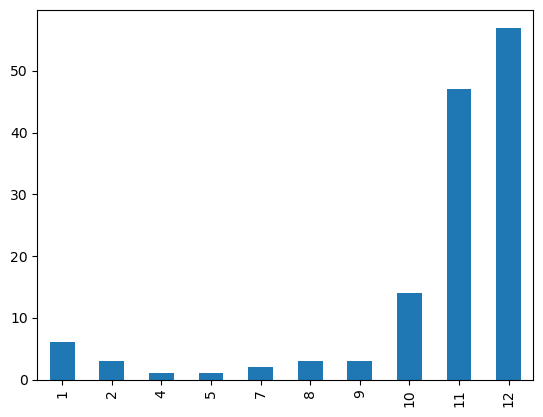

In [47]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

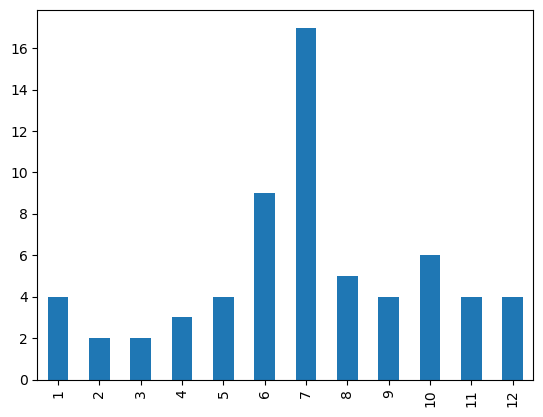

In [73]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/home/william/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


<AxesSubplot:>

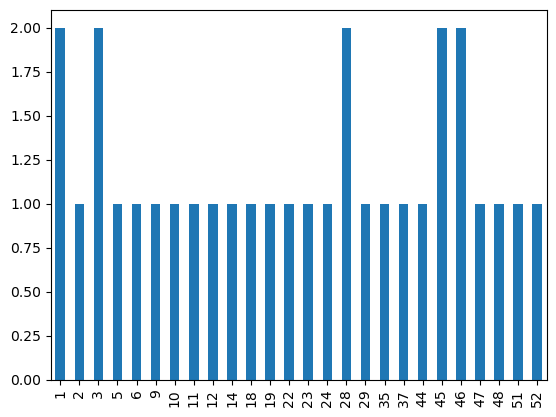

In [74]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [83]:
keanu_leads = keanu_roles[keanu_roles['n'] == 1.0]
keanu_leads2 = pd.DataFrame([keanu_roles.title, keanu_roles.year]).transpose()
keanu_leads2.sort_values("year")

,title,year
1892373,One Step Away,1985
1892403,Youngblood,1986
1892377,River's Edge,1986
1892355,Flying,1986
1892395,The Prince of Pennsylvania,1988
...,...,...
1892381,SPF-18,2017
1892401,To the Bone,2017
1892362,John Wick: Chapter 2,2017
1892378,Siberia,2018


In [98]:
reldates = release_dates.filter(items = ["title", "date"]).drop_duplicates(subset=['title'])
reldates = reldates.merge(keanu_leads2, on="title").sort_values(by="date")
reldates

,title,date,year
37,Speed,1922-10-22,1994
8,Dracula,1931-02-14,1992
41,The Day the Earth Stood Still,1951-12-25,2008
55,The Whole Truth,1958-09-19,2016
39,Sweet November,1968-02-08,2001
29,One Step Away,1985-09-13,1985
59,Youngblood,1986-01-31,1986
13,Flying,1986-09-12,1986
33,River's Edge,1987-04-23,1986
50,The Night Before,1988-04-15,1988


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

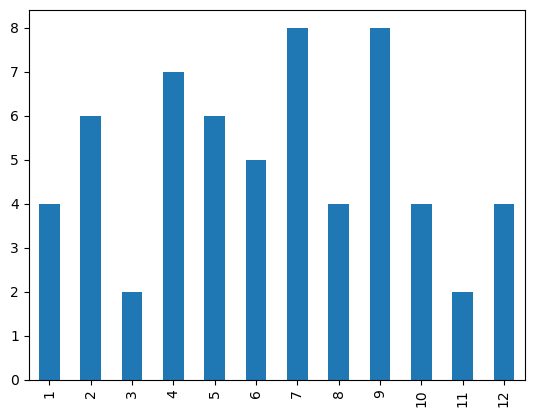

In [99]:
reldates.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

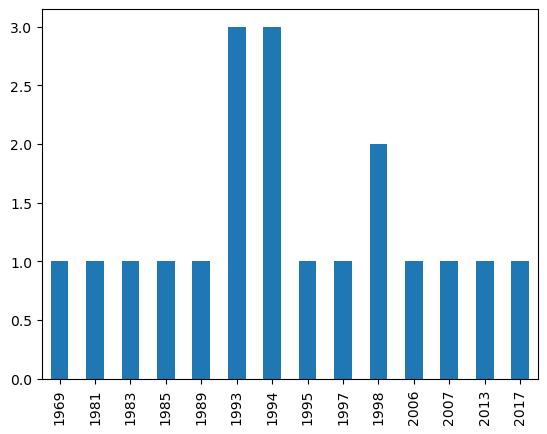

In [113]:
ian = cast[cast["name"]=='Ian McKellen']
ian = ian.merge(release_dates, on="title")
ian.drop_duplicates(subset=['title'])
ian = ian.filter(items = ["title", "year_x", "country"]).drop_duplicates(subset=['title'])
ian_usa = ian[ian["country"] == "USA"]
ian_usa.year_x.value_counts().sort_index().plot(kind='bar')